# Module 2

## Task descriptions
1. **Loading all necessary libraries**:
   - This task involves importing a variety of libraries required for text analysis, visualization, and data manipulation. These include libraries like `pandas`, `nltk`, `matplotlib`, and `wordcloud`, which help with tasks like tokenization, word frequency calculation, and plotting.

2. **Getting the word count and building a word cloud based on that**:
   - In this task, the review text data is processed by cleaning and removing common words (stopwords). The frequency of the remaining words is then calculated, and the most frequent words are visualized in a word cloud, providing a visual representation of the most prominent terms.

3. **Calculating the lift matrix and building a better visualization to represent the matrix**:
   - The lift matrix helps identify associations between different terms. This task calculates the lift values between word pairs in the dataset and visualizes them in a way that highlights the strength of these associations, often for better insight into word co-occurrence patterns.

4. **Formulating the dissimilarity matrix**:
   - In this step, the dissimilarity matrix is created to measure how different words or reviews are from each other. This helps in clustering or visualizing how far apart certain terms or reviews are, based on their word usage.

5. **Making the MDS plot**:
   - Multidimensional scaling (MDS) is used to visualize the distance or dissimilarity between different data points. In this task, the dissimilarity matrix from the previous step is plotted using MDS, allowing you to see how different terms or reviews are grouped or spaced apart in lower dimensions.

6. **Stemming**:
   - Stemming reduces words to their root form (e.g., "running" becomes "run"). This task involves applying stemming to the dataset to standardize the different variations of the same word, helping to improve word analysis.

7. **Lemmatization**:
   - Similar to stemming, lemmatization reduces words to their base or dictionary form. However, it considers the context and ensures that the reduced word is meaningful. This task applies lemmatization to further refine word standardization in the dataset.

Loading all necessary libraries

In [2]:
#!pip install wordcloud
!pip install tabulate

In [3]:
import pandas as pd
import re
from collections import Counter
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
import seaborn as sns
from sklearn.manifold import MDS
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
from tabulate import tabulate
from nltk.stem import WordNetLemmatizer

Getting the word count and building a word cloud based on that

In [7]:
# Download the NLTK stopwords [download method]
nltk.download('stopwords')

# Load your dataset
reviews_df = pd.read_csv("E:\MMA\Winter 2025\insy669 text\Labs\yelp_reviews.csv")

# Extract the 'Review Text' column (adjust the column name if needed)
reviews = reviews_df['Review']

# Clean the text: Convert to lowercase, remove punctuation, and split into words
processed_reviews = ' '.join(reviews).lower()
processed_reviews = re.sub(r'[^\w\s]', '', processed_reviews)  # Remove punctuation
words = processed_reviews.split()

# Use nltk stopwords
stop_words = set(stopwords.words('english'))

# Remove stopwords and pass to an object called filtered_words
filtered_words = [word for word in words if word not in stop_words]

# Count the frequency of each word
word_counts = Counter(filtered_words)

# Get the top 50 most common words
top_50_words = word_counts.most_common(50)

# Convert to DataFrame and call it top_50_df
top_50_df = pd.DataFrame(top_50_words)

# Display the DataFrame as a table
print(top_50_df)

            0    1
0        cake  589
1       cakes  491
2       bundt  312
3   chocolate  203
4         one  160
5       order  155
6     nothing  150
7         get  147
8     flavors  146
9        love  146
10      moist  142
11   frosting  138
12  delicious  137
13      place  134
14     velvet  130
15        red  129
16     always  129
17       time  128
18       good  128
19   birthday  127
20    service  123
21      great  117
22      store  116
23       like  102
24         go   96
25     flavor   88
26      would   84
27     little   82
28      never   82
29      white   81
30        ive   81
31   customer   80
32   favorite   78
33        got   77
34      sweet   74
35    ordered   72
36        try   72
37       also   69
38       back   69
39   location   69
40      staff   68
41      cream   68
42     really   68
43         im   67
44       dont   66
45   friendly   64
46    amazing   64
47       best   64
48       pick   63
49  raspberry   63


<>:5: SyntaxWarning: invalid escape sequence '\M'
<>:5: SyntaxWarning: invalid escape sequence '\M'
C:\Users\Behzad\AppData\Local\Temp\ipykernel_26788\1466817452.py:5: SyntaxWarning: invalid escape sequence '\M'
  reviews_df = pd.read_csv("E:\MMA\Winter 2025\insy669 text\Labs\yelp_reviews.csv")
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Behzad\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


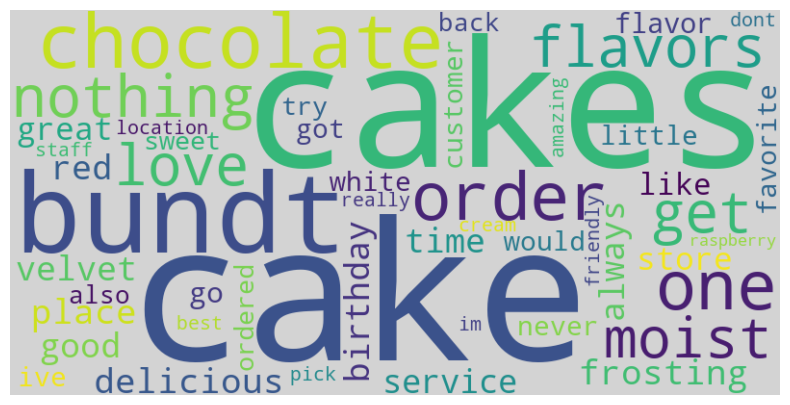

In [10]:
# Create a dictionary of words and their frequencies for the word cloud
word_freq_dict = dict(top_50_words)

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='lightgrey').generate_from_frequencies(word_freq_dict)

# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # No axes for the word cloud
plt.show()


Calculating the lift matrix and building a better visualization to represent the matrix

In [17]:
words

['ordered',
 'online',
 'from',
 'here',
 'for',
 'my',
 'sister',
 'in',
 'laws',
 'engagement',
 'we',
 'had',
 'a',
 'planned',
 'party',
 'after',
 'at',
 'my',
 'inlaws',
 'to',
 'celebrate',
 'and',
 'i',
 'was',
 'in',
 'charge',
 'of',
 'the',
 'cake',
 'so',
 'clearly',
 'instead',
 'of',
 'baking',
 'anything',
 'i',
 'decided',
 'to',
 'order',
 'from',
 'nothing',
 'bundt',
 'cakesthe',
 'process',
 'is',
 'sooo',
 'easy',
 'you',
 'can',
 'order',
 'ahead',
 'online',
 'i',
 'admit',
 'i',
 'waited',
 'to',
 'the',
 'last',
 'minute',
 'to',
 'order',
 'so',
 'i',
 'ordered',
 'late',
 'at',
 'night',
 'for',
 'the',
 'day',
 'before',
 'they',
 'have',
 'ones',
 'you',
 'can',
 'order',
 'with',
 'different',
 'decorations',
 'if',
 'you',
 'want',
 'depending',
 'on',
 'what',
 'the',
 'occasion',
 'is',
 'we',
 'just',
 'got',
 'the',
 'simple',
 'bundtini',
 'cakes',
 'which',
 'are',
 'basically',
 'like',
 'their',
 'version',
 'of',
 'a',
 'cupcake',
 'and',
 'did',

<>:2: SyntaxWarning: invalid escape sequence '\M'
<>:2: SyntaxWarning: invalid escape sequence '\M'
C:\Users\Behzad\AppData\Local\Temp\ipykernel_26788\1753145792.py:2: SyntaxWarning: invalid escape sequence '\M'
  reviews_df = pd.read_csv("E:\MMA\Winter 2025\insy669 text\Labs\yelp_reviews.csv")


Lift Matrix (top 50 words):

           amazing   best  birthday  bundt   cake  cakes  cheese  chocolate  \
amazing        NaN  1.685     0.396  1.590  1.489  1.581   1.767      1.168   
best         1.685    NaN     0.792  1.428  1.220  1.435   2.239      1.593   
birthday     0.396  0.792       NaN  1.149  1.919  1.114   0.653      1.195   
bundt        1.590  1.428     1.149    NaN  1.700  2.108   2.175      2.012   
cake         1.489  1.220     1.919  1.700    NaN  1.198   1.677      1.512   
cakes        1.581  1.435     1.114  2.108  1.198    NaN   1.904      1.703   
cheese       1.767  2.239     0.653  2.175  1.677  1.904     NaN      1.709   
chocolate    1.168  1.593     1.195  2.012  1.512  1.703   1.709        NaN   
cream        1.480  2.008     0.746  2.016  1.723  1.819   9.315      2.299   
customer     1.527  1.438     1.494  0.885  1.220  1.031   0.660      0.595   
day          1.009  0.126     2.669  1.086  1.699  1.331   0.265      1.193   
delicious    1.364  0.8

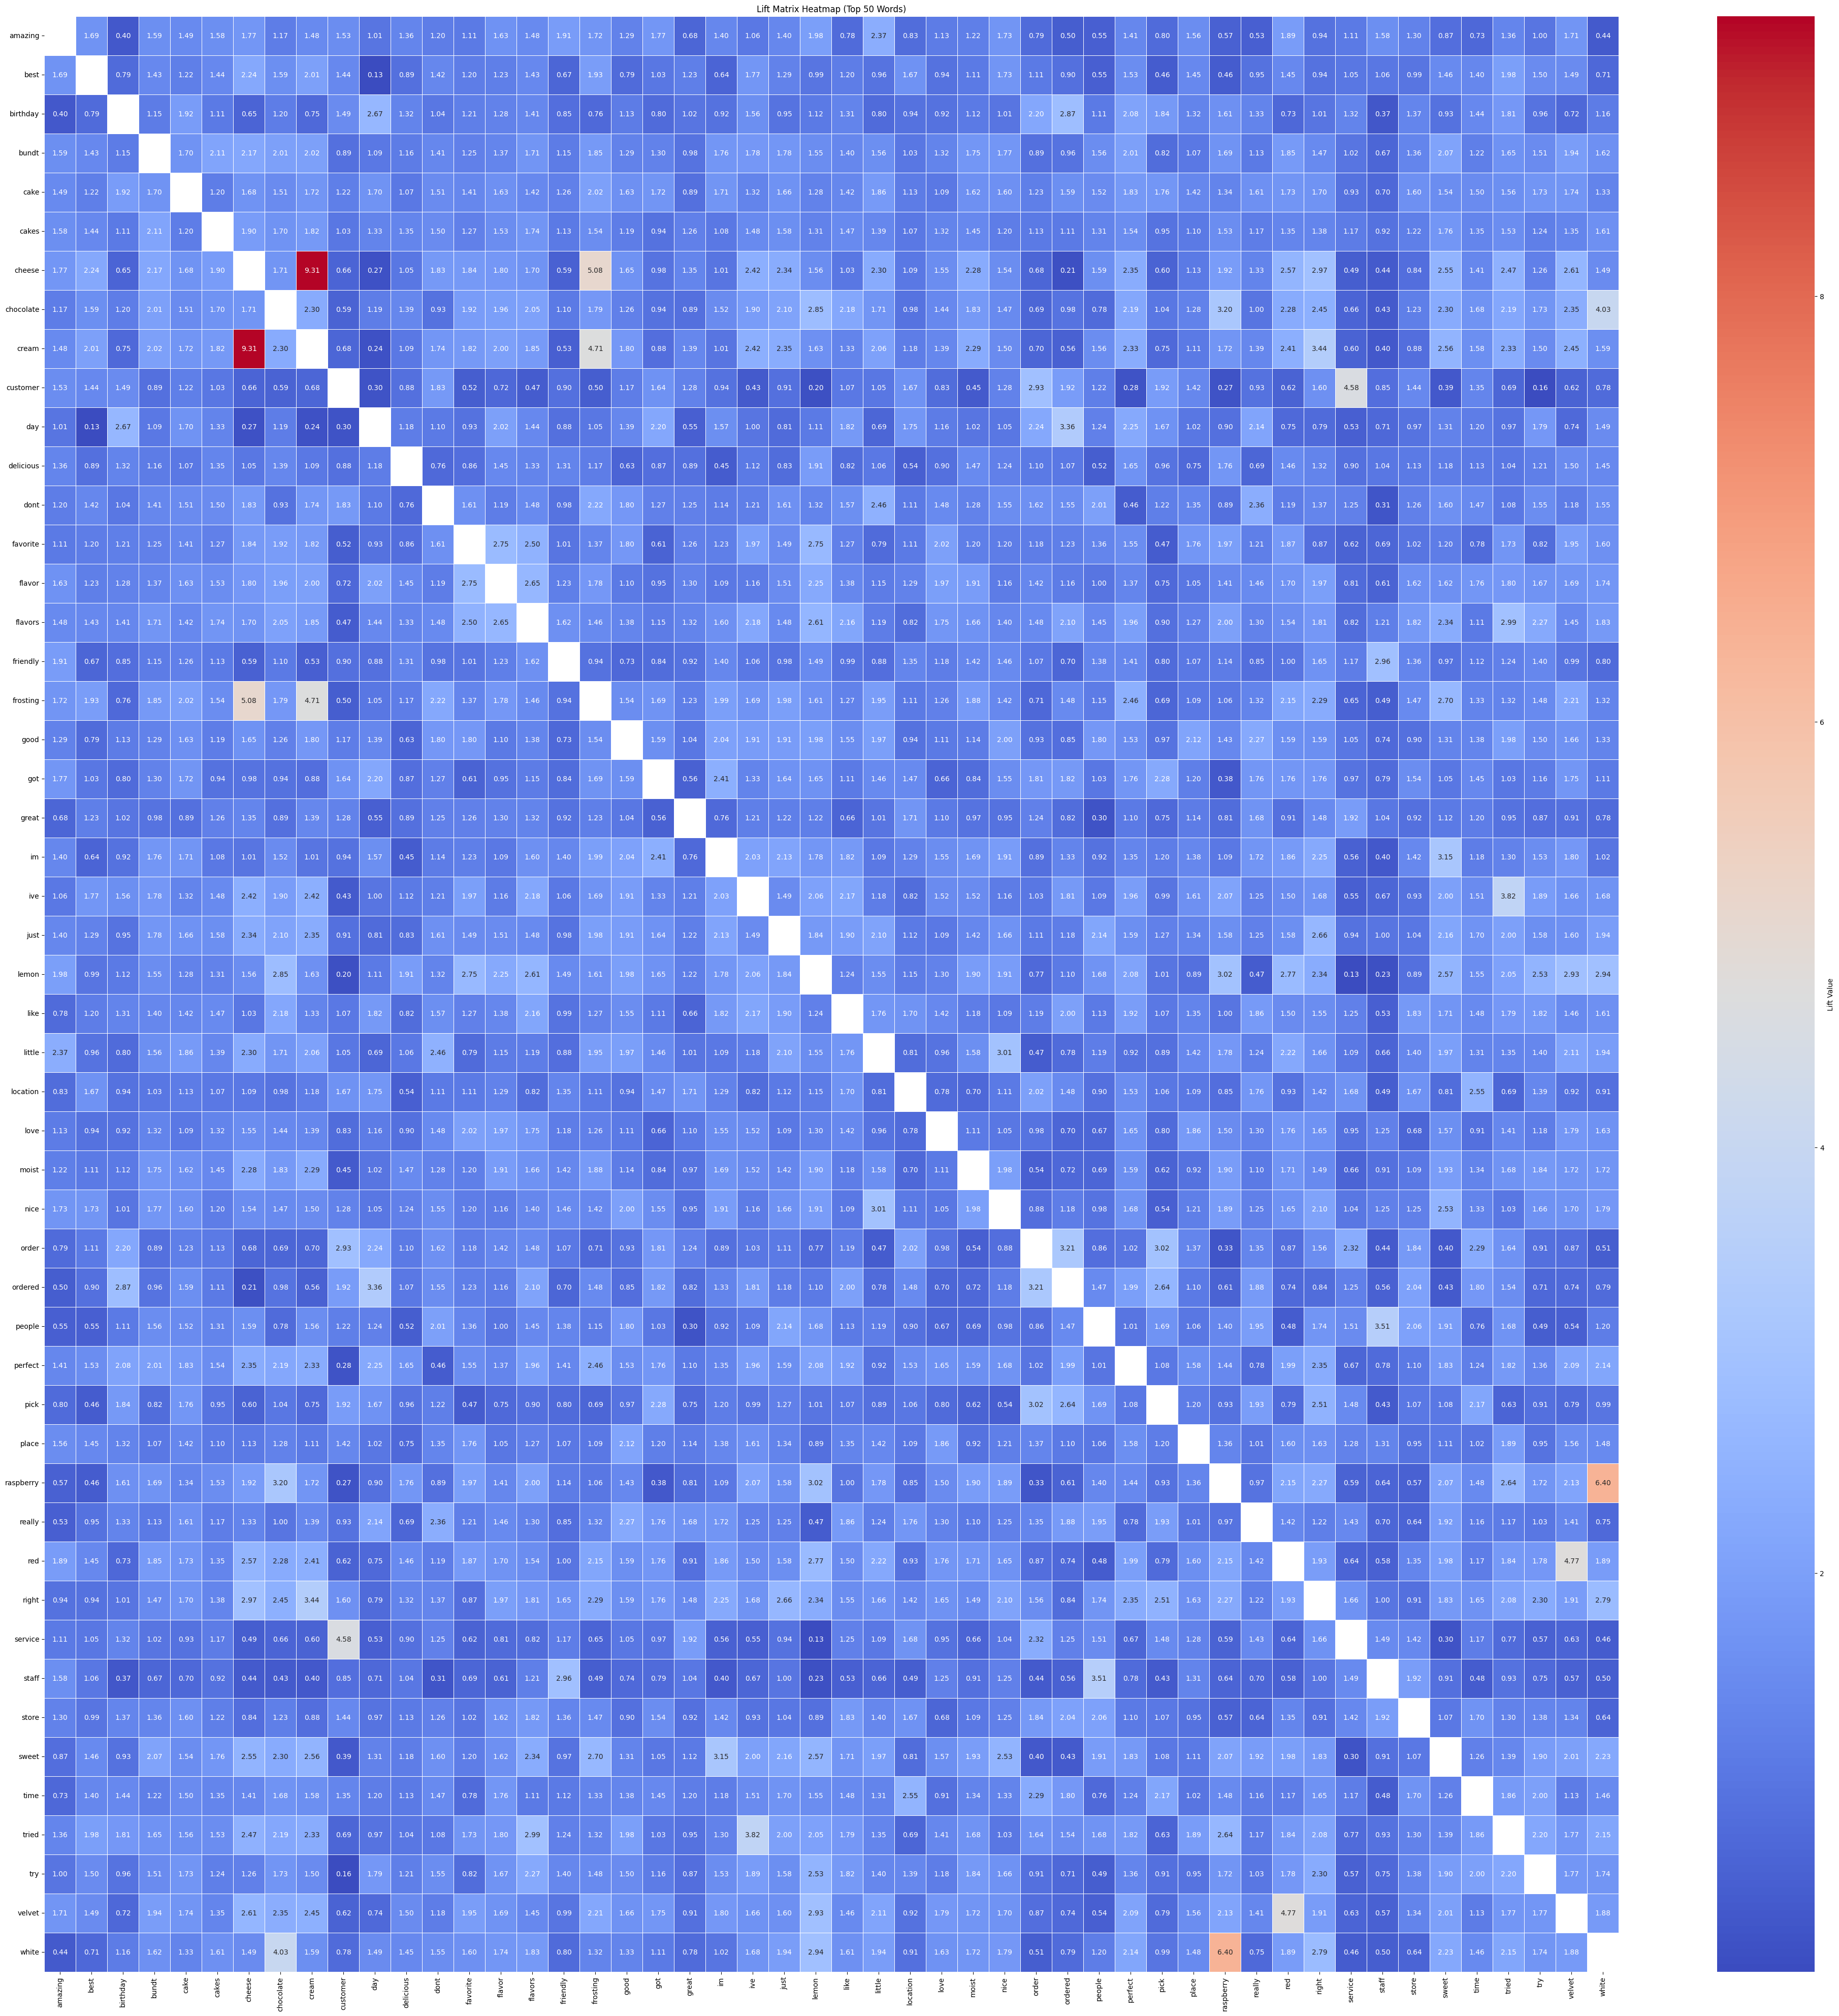

In [22]:
# Load your dataset
reviews_df = pd.read_csv("E:\MMA\Winter 2025\insy669 text\Labs\yelp_reviews.csv")

# Extract the 'Review Text' column (adjust the column name if needed)
reviews = reviews_df['Review']

# Clean the text: Convert to lowercase, remove punctuation, and split into words
processed_reviews = reviews.astype(str).str.lower()

# Remove punctuation using pandas .str.replace (regex)
processed_reviews = processed_reviews.str.replace(r'[^\w\s]', '', regex=True)

# Use CountVectorizer to create the term-document matrix for the most common words
vectorizer = CountVectorizer(stop_words='english', max_features=50)  # Limiting to top 50 words
X = vectorizer.fit_transform(processed_reviews)

# Get the words from the vectorizer
words = vectorizer.get_feature_names_out()

# Create a co-occurrence matrix (co-occurrence of words across reviews)
co_occurrence_matrix = (X.T * X).toarray()

# Set diagonal (self-co-occurrence) to zero
np.fill_diagonal(co_occurrence_matrix, 0)

# Compute the word frequencies (number of reviews each word appears in)
word_frequencies = X.sum(axis=0).A1

# Calculate the expected co-occurrence matrix
expected_co_occurrence_matrix = np.outer(word_frequencies, word_frequencies) / X.shape[0]

# Calculate the lift matrix
lift_matrix = co_occurrence_matrix / expected_co_occurrence_matrix

# Convert the lift matrix to a DataFrame for easier visualization
lift_df = pd.DataFrame(lift_matrix, index=words, columns=words)

# Replace 0 values with NaN to avoid clutter
lift_df.replace(0, np.nan, inplace=True)

# Format the values to 3 decimal places
lift_df = lift_df.round(3)

# Display the lift matrix
print("Lift Matrix (top 50 words):\n")
print(lift_df)

# Visualize the lift matrix using a heatmap
plt.figure(figsize=(50, 50))
sns.heatmap(lift_df, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5, cbar_kws={'label': 'Lift Value'})
plt.title('Lift Matrix Heatmap (Top 50 Words)')
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.show()


Formulating the dissimilarity matrix

In [25]:
# Assuming lift_df is the lift matrix DataFrame
# Replace zero or NaN values in the lift matrix to avoid division by zero
lift_df = lift_df.replace([np.inf, -np.inf, 0], np.nan)

# Calculate the dissimilarity matrix by taking the inverse of the lift values
dissimilarity_matrix = 1/lift_df

# Replace NaN values (due to division by zero) with a large value indicating maximum dissimilarity
dissimilarity_matrix.fillna(dissimilarity_matrix.max().max() * 2, inplace=True)

# Display the dissimilarity matrix
print(dissimilarity_matrix)

             amazing       best   birthday      bundt       cake      cakes  \
amazing    15.873016   0.593472   2.525253   0.628931   0.671592   0.632511   
best        0.593472  15.873016   1.262626   0.700280   0.819672   0.696864   
birthday    2.525253   1.262626  15.873016   0.870322   0.521105   0.897666   
bundt       0.628931   0.700280   0.870322  15.873016   0.588235   0.474383   
cake        0.671592   0.819672   0.521105   0.588235  15.873016   0.834725   
cakes       0.632511   0.696864   0.897666   0.474383   0.834725  15.873016   
cheese      0.565931   0.446628   1.531394   0.459770   0.596303   0.525210   
chocolate   0.856164   0.627746   0.836820   0.497018   0.661376   0.587199   
cream       0.675676   0.498008   1.340483   0.496032   0.580383   0.549753   
customer    0.654879   0.695410   0.669344   1.129944   0.819672   0.969932   
day         0.991080   7.936508   0.374672   0.920810   0.588582   0.751315   
delicious   0.733138   1.121076   0.756430   0.86058

Making the MDS plot

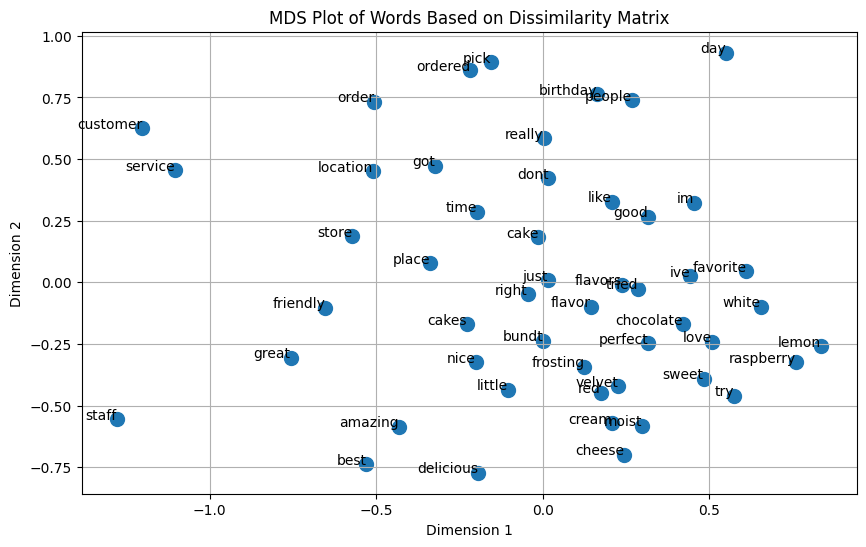

In [27]:
# Assuming dissimilarity_matrix is the DataFrame from the previous step
# Convert dissimilarity matrix DataFrame to NumPy array
dissimilarity_array = np.array(dissimilarity_matrix)

# Apply MDS to reduce to 2 dimensions
mds = MDS(n_components=2, dissimilarity='precomputed', random_state=42)
mds_coordinates = mds.fit_transform(dissimilarity_array)

# Create a DataFrame for the MDS results
mds_df = pd.DataFrame(mds_coordinates, columns=['Dimension 1', 'Dimension 2'], index=dissimilarity_matrix.index)

# Plot the MDS result
plt.figure(figsize=(10, 6))
plt.scatter(mds_df['Dimension 1'], mds_df['Dimension 2'], s=100)

# Annotate each point with the wordf
for word, (x, y) in mds_df.iterrows():
    plt.text(x, y, word, fontsize=10, ha='right')

plt.title('MDS Plot of Words Based on Dissimilarity Matrix')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.grid(True)
plt.show()


In [37]:
sample_review = reviews_df['Review'][0]
#word_tokenize(sample_review)
print(sample_review)
print(type(sample_review))


Ordered online from here for my sister in laws engagement! We had a planned party after at my inlaws to celebrate and I was in charge of the cake, so clearly, instead of baking anything, I decided to order from Nothing Bundt Cakes.The process is sooo easy. You can order ahead online. I admit, I waited to the last minute to order, so I ordered late at night for the day before. They have ones you can order with different decorations if you want, depending on what the occasion is. We just got the simple bundtini cakes (which are basically like their version of a cupcake) and did the mix of the flavors and did two dozen, which was perfect! We got red velvet, lemon, chocolate, and some other flavors, too. Literally, they're all sooo good.My husband went in to pick them up and they were ready to go at the time we asked them to be ready for. Simple easy process and I forgot how delicious these are and will definitely be ordering them more in the future!
<class 'str'>


Stemming

In [43]:
# Download NLTK data files (only needs to be run once)
nltk.download('punkt_tab')
import nltk
from nltk.stem import PorterStemmer

# Initialize stemmer
ps = PorterStemmer()

# Example function to apply stemming
def apply_stemming(text):
    # Tokenize the review text
    tokens = word_tokenize(text)

    # Apply stemming
    stemmed = [ps.stem(token) for token in tokens]
    
    # Create a side-by-side table
    table = zip(tokens, stemmed)
    
    return tabulate(table, headers=["Original", "Stemmed"], tablefmt="pretty")

# Apply to a sample review from the dataset
sample_review = str(reviews_df['Review'][0])
stemmed_review = apply_stemming(sample_review)

# Display the result
print(stemmed_review)


[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\Behzad\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt_tab.zip.


+-------------+----------+
|  Original   | Stemmed  |
+-------------+----------+
|   Ordered   |  order   |
|   online    |  onlin   |
|    from     |   from   |
|    here     |   here   |
|     for     |   for    |
|     my      |    my    |
|   sister    |  sister  |
|     in      |    in    |
|    laws     |   law    |
| engagement  |  engag   |
|      !      |    !     |
|     We      |    we    |
|     had     |   had    |
|      a      |    a     |
|   planned   |   plan   |
|    party    |  parti   |
|    after    |  after   |
|     at      |    at    |
|     my      |    my    |
|   inlaws    |  inlaw   |
|     to      |    to    |
|  celebrate  |  celebr  |
|     and     |   and    |
|      I      |    i     |
|     was     |    wa    |
|     in      |    in    |
|   charge    |  charg   |
|     of      |    of    |
|     the     |   the    |
|    cake     |   cake   |
|      ,      |    ,     |
|     so      |    so    |
|   clearly   | clearli  |
|      ,      |    ,     |
|

Lemmatization

In [44]:
# Download NLTK data files (only needs to be run once)
nltk.download('punkt_tab')
nltk.download('wordnet')
nltk.download('omw-1.4')

# Initialize lemmatizer
wl = WordNetLemmatizer()

# Example function to apply lemmatization
def apply_lemmatization(text):
    # Tokenize the review text
    tokens = word_tokenize(text)
    
    # Apply lemmatization
    lemmatized = [wl.lemmatize(token) for token in tokens]
    
    # Create a side-by-side table
    table = zip(tokens, lemmatized)
    
    return tabulate(table, headers=["Original", "Lemmatized"], tablefmt="pretty")

# Apply to a sample review from the dataset
sample_review = str(reviews_df['Review'][0])
lemmatized_review = apply_lemmatization(sample_review)

# Display the result
print(lemmatized_review)


[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\Behzad\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Behzad\AppData\Roaming\nltk_data...
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\Behzad\AppData\Roaming\nltk_data...


+-------------+------------+
|  Original   | Lemmatized |
+-------------+------------+
|   Ordered   |  Ordered   |
|   online    |   online   |
|    from     |    from    |
|    here     |    here    |
|     for     |    for     |
|     my      |     my     |
|   sister    |   sister   |
|     in      |     in     |
|    laws     |    law     |
| engagement  | engagement |
|      !      |     !      |
|     We      |     We     |
|     had     |    had     |
|      a      |     a      |
|   planned   |  planned   |
|    party    |   party    |
|    after    |   after    |
|     at      |     at     |
|     my      |     my     |
|   inlaws    |   inlaws   |
|     to      |     to     |
|  celebrate  | celebrate  |
|     and     |    and     |
|      I      |     I      |
|     was     |     wa     |
|     in      |     in     |
|   charge    |   charge   |
|     of      |     of     |
|     the     |    the     |
|    cake     |    cake    |
|      ,      |     ,      |
|     so      